In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2

In [5]:
# Let's create a class which will generate our data-
class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1 # probability of click for group -1
        self.p2 = p2 # probability of click for group -2
        
    # next() will return the result if the person clicked on advertisement-1 or advertisement-2
    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2

In [6]:
# Write a function for getting the p-value
def get_p_value(T):  # it will take the contingency table, computes the Chi-squared statistics and returns the p-value
    det = T[0, 0]*T[1, 1] - T[0, 1]*T[1, 0] # determinant of the matrix
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:, 0].sum() / T[:, 1].sum() # Chi-squared stats
    p = 1 - chi2.cdf(x = c2, df = 1)  # p-value. the d.f. is (r-1)*(c-1) where r and c are rows and columns respectively
    return p

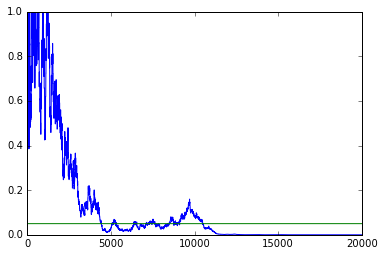

In [7]:
# Function to run an experiment-
def run_experiment(p1, p2, N): # prob of Group1, prob of Group2 and number of samples
    data = DataGenerator(p1, p2) # creating an instance of Data generator
    p_values = np.empty(N) # an array of size N
    T = np.zeros((2, 2)).astype(np.float32)  # contingency table of size 2by2
    for i in range(N):  # for all datapoints we are obtaining click1 and click2
        c1, c2 = data.next()
        # update the contingency table. 
        T[0, c1] += 1  # for Ad-1 . Here no_click is the 1st column and click is the 2nd column
        T[1, c2] += 1  # for Ad-2
        # We have to ignore the first few values that we get to calculate the p-values
        # as we are diving the row sum column sum to calculate the chi-squared stats, so if they are 0 then it will 
        # give a runtime error
        if i < 10:
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)  # plotting the threshold with alpha = 5 %
    
run_experiment(0.1, 0.11, 20000)  # CTR1 = 0.1 and CTR2 = 0.11, and 20,000 iterations (data points)

In [8]:
# So, looking at the graph, we figured out that p-value becomes significant around the 5,000 iterations and again moves up
# there with some blips. We know the two means are different

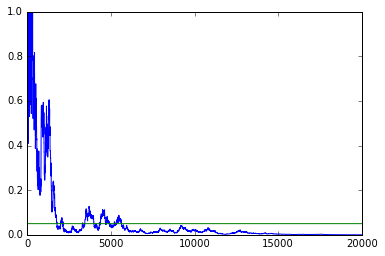

In [9]:
run_experiment(0.1, 0.11, 20000)

In [10]:
# This time the result is little different.

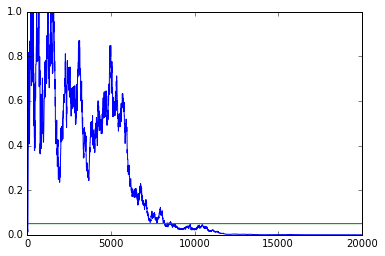

In [11]:
run_experiment(0.1, 0.11, 20000)

In [12]:
# Again completely different result. See, almost uptil 10,000 iterations it shows that the Means are same.
# However we know the True means are different.

In [ ]:
# So, as you see that the p-value is problematic. At times it goes over the significance level and at times below the significance
# level.